<a href="https://colab.research.google.com/github/rits1995/Data-Sciecne-mini-Project/blob/main/DecisionTree_RandomForest_LinearRegression_RiteshKumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You are hired by a venture capitalist to predict the profit of a startup. Fo that you have to deal with a dataset which contains the details of 50 startup’s and predicts the profit of a new Startup based on certain features. Based on your decision and prediction, whether one should invest in a particular startup or not.

Dataset contains the following fields: 
R&D Stend - Total amount of money spent on Research and Development Administration - Total amount of money spent on Administration 
Marketing Spend - Total amount of money spent on Markeing 
State - The state where the startup operates 
Profit - Profit earned by startup

You have to perform following task before applying machine learning algorithms: 
1) Handle missing values 
2) Prepare data for training and testing
3) Apply Decision Tree algorithm to train the model
4) Apply Random Forest Regressor algorithm to train the model
5) Compare the accuracy with Linear Regression too.

In [ ]:

import numpy as np      
import pandas as pd

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/50_Startups.csv')

## Handle Mission Values

In [ ]:
#handle mission values
data.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.isnull()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [ ]:

data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#Output---> No missioin values

In [ ]:
#displays number of columns and records/rows in dataset
#check if there is any missing data or not
#data.info()

## Finding Outliers

In [ ]:

import seaborn as sns
import numpy  as np
import matplotlib.pyplot  as plt

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


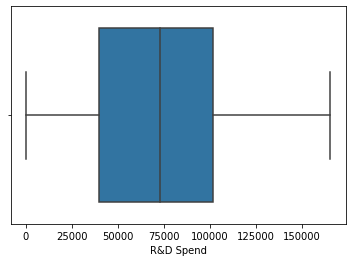

In [ ]:
#Finding Outier using BoxPlot
sns.boxplot(data["R&D Spend"])



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


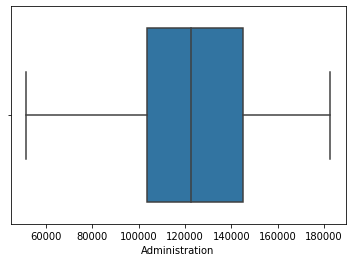

In [ ]:
sns.boxplot(data["Administration"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


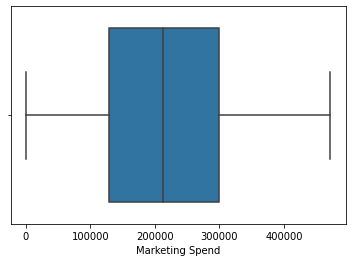

In [ ]:
sns.boxplot(data["Marketing Spend"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


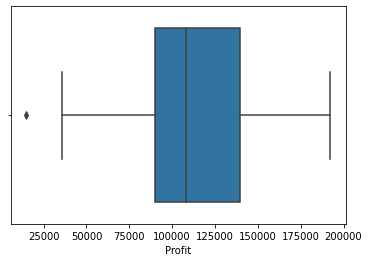

In [ ]:
sns.boxplot(data["Profit"])
#We Observe one Outlier in profit

In [ ]:
data['Profit'].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [ ]:
#Get the Shape of he data
data.shape

(50, 5)

## Handle Outlier


In [ ]:
#Implementation of outlier
Q1=data['Profit'].quantile(0.25)
Q3=data['Profit'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - (1.5)*IQR
Upper_Whisker = Q3 + (1.5)*IQR
print(Lower_Whisker, Upper_Whisker)

90138.9025
139765.97749999998
49627.07499999998
15698.290000000023 214206.58999999997


In [ ]:
#Outlier treatment
df = data[data['Profit']< Upper_Whisker]

In [ ]:
#Using Z Score method to Remove Outlier
#Getting Z Score Table
from scipy import stats
z=np.abs(stats.zscore(data.Profit))
print(z)

[2.01120333 1.99942997 1.98084225 1.77662724 1.35774012 1.12724963
 1.10548055 1.09620987 1.00746967 0.94602247 0.85484675 0.80816756
 0.74115484 0.55874952 0.51602637 0.44871967 0.3754357  0.33477114
 0.307116   0.26977265 0.16193522 0.01753384 0.04161264 0.08216943
 0.08672946 0.11549309 0.15736664 0.17554233 0.21879755 0.27588222
 0.3026246  0.36412744 0.36552389 0.38178711 0.38344421 0.38929092
 0.53393161 0.5529549  0.77149734 0.77709368 0.84641135 0.85746568
 1.01536466 1.05896021 1.17320899 1.18008224 1.56692212 1.74062718
 1.91321197 2.43931323]


In [ ]:
#In the above table we can see that if Z Score is greater then 2 the it is classified as outlier 
threshold=2
print(np.where(z>2))
df1=df[(z< 2)]
print(df1)

(array([ 0, 49]),)
    R&D Spend  Administration  Marketing Spend       State     Profit
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
1

In [ ]:
df1.shape
#Outier is removed

(48, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


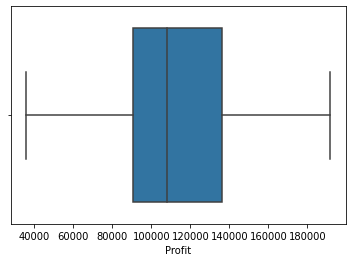

In [ ]:
#visualization of "Profit" column after removal of Outlier
sns.boxplot(df1["Profit"])

In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
features = data.iloc[:,:-1].values
label = data.iloc[:,[-1]].values

In [ ]:
features

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

### One Hot Encoder to make it (0 or 1)

In [ ]:
#convert the categorical features to numerical features as 
#sklearn works only with numpy array
#Instead of label enconding and then onehotencoding, 
#newer version directly works with onehotencoding using ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [3]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
features = transformer.fit_transform(features.tolist())
features

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [ ]:
#converting an object to normal array
features = features.astype(float)

In [ ]:
features

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

# Splitting the dataset For Training and Testing

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=1)

# Fitting Decision Tree Regressor

In [ ]:
#Create our model using Linear Regression
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=3)
DTR.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Train and Test Score of DTR

In [ ]:
#checking score of training as well as testing
train_DTR= (DTR.score(X_train,y_train))
test_DTR= (DTR.score(X_test,y_test))
print(train_DTR)
print(test_DTR)

0.9719776806321837
0.8784483297473074


In [ ]:
#prediction of the model
y_predict= DTR.predict(X_test)
y_predict

array([108933.22428571,  93217.17714286,  93217.17714286,  69836.542     ,
       192026.945     , 156170.98333333,  69836.542     , 108933.22428571,
        69836.542     ,  93217.17714286])

# Fitting Random Forest Regressor

#



In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=3)
RF.fit(X_train,y_train.ravel())
train_RFR= (RF.score(X_train,y_train))
test_RFR= (RF.score(X_test,y_test))
print(train_RFR)
print(test_RFR)

0.9749415953851834
0.9002549135680276


Train and Test score of RFR

In [ ]:
from sklearn.ensemble import RandomForestRegressor
for i in range(4,10):
    RF=RandomForestRegressor(n_estimators=3)
    RF.fit(X_train,y_train.ravel())
    print("n_estimator = ",i)
    print("Training Score =",RF.score(X_train,y_train))
    print("TEsting Score = ",RF.score(X_test,y_test))

n_estimator =  4
Training Score = 0.9610304072891983
TEsting Score =  0.9662571715923061
n_estimator =  5
Training Score = 0.9453588448109193
TEsting Score =  0.9589774155856924
n_estimator =  6
Training Score = 0.9732951761726182
TEsting Score =  0.9188606840688328
n_estimator =  7
Training Score = 0.9525678232532714
TEsting Score =  0.9356548020296866
n_estimator =  8
Training Score = 0.9848170748697757
TEsting Score =  0.966472213631123
n_estimator =  9
Training Score = 0.9721283621808003
TEsting Score =  0.9167745354638784


# Multiclass Linear regession model

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


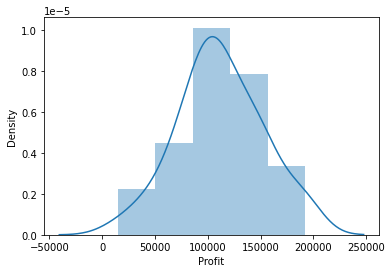

In [ ]:
#Histgram on Profit
sns.distplot(data['Profit'],bins=5,kde=True)

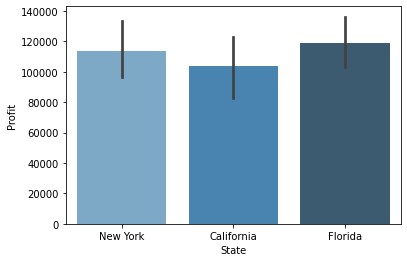

In [ ]:
sns.barplot(x='State',y='Profit',data=data, palette="Blues_d")
#sns.lineplot(x='State',y='Profit',data=dataset)

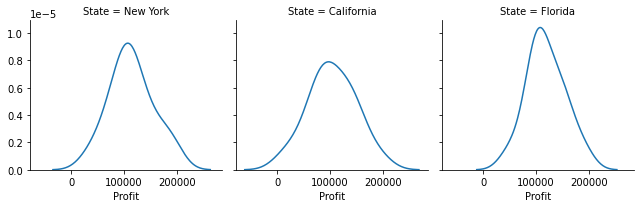

In [ ]:
# spread of profit against state 
g=sns.FacetGrid(data, col='State')
g=g.map(sns.kdeplot,'Profit')

## Liner Regression and its Accuracy

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, 4]

In [ ]:

states=pd.get_dummies(X['State'],drop_first=True)

# Drop the state coulmn
X=X.drop('State',axis=1)

# concat the dummy variables
X=pd.concat([X,states],axis=1)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:

regressor.fit(X_train, y_train)
print("n_estimator = ",i)

train_LR= regressor.score(X_train,y_train)
score=r2_score(y_test,y_pred)
print(train_LR)
test_LR= score
print(score)

n_estimator =  9
0.9501847627493607
0.9347068473282423


# Visualizing Accuracy of the Decision Tree Regression , Random Forest, and Multiple Linear Regression

In [ ]:
print("Train-Test Score of the DTR, RFT and LR")
print("---------------------------------------")
print("\n********** Decision Tree Rregressor **********\n")
print("Training_score: ",train_DTR)
print("Testing_score: ",test_DTR)
print("\n********** Random Forest Regressor **********\n")
print("Training_score: ",train_RFR)
print("Testing_score: ",test_RFR)
print("\n********** Linear Regressor **********\n")
print("Training_score: ",train_LR)
print("Testing_score: ",test_LR)


Train-Test Score of the DTR, RFT and LR
---------------------------------------

********** Decision Tree Rregressor **********

Training_score:  0.9719776806321837
Testing_score:  0.8784483297473074

********** Random Forest Regressor **********

Training_score:  0.9749415953851834
Testing_score:  0.9002549135680276

********** Linear Regressor **********

Training_score:  0.9501847627493607
Testing_score:  0.9347068473282423
